In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("seaborn")

/var/folders/5z/wzj0qt495bbdktpqnnk1nx100000gn/T/ipykernel_1655/1123596123.py:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


In [3]:
df = pd.read_csv('bitcoin.csv',parse_dates=["Date"],index_col="Date")
df

,Open,High,Low,Close,Volume
Date,,,,,
2017-08-17 04:00:00,4261.48,4313.62,4261.32,4308.83,47.181009
2017-08-17 05:00:00,4308.83,4328.69,4291.37,4315.32,23.234916
2017-08-17 06:00:00,4330.29,4345.45,4309.37,4324.35,7.229691
2017-08-17 07:00:00,4316.62,4349.99,4287.41,4349.99,4.443249
2017-08-17 08:00:00,4333.32,4377.85,4333.32,4360.69,0.972807
...,...,...,...,...,...
2021-10-07 05:00:00,55073.20,55073.21,54545.07,54735.76,2251.122020
2021-10-07 06:00:00,54735.77,54968.06,54375.83,54534.16,1783.004260
2021-10-07 07:00:00,54534.16,54793.26,54235.33,54755.92,4163.431360


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 36168 entries, 2017-08-17 04:00:00 to 2021-10-07 09:00:00
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    36168 non-null  float64
 1   High    36168 non-null  float64
 2   Low     36168 non-null  float64
 3   Close   36168 non-null  float64
 4   Volume  36168 non-null  float64
dtypes: float64(5)
memory usage: 1.7 MB


In [5]:
df = df[['Close','Volume']].copy()
df

,Close,Volume
Date,,
2017-08-17 04:00:00,4308.83,47.181009
2017-08-17 05:00:00,4315.32,23.234916
2017-08-17 06:00:00,4324.35,7.229691
2017-08-17 07:00:00,4349.99,4.443249
2017-08-17 08:00:00,4360.69,0.972807
...,...,...
2021-10-07 05:00:00,54735.76,2251.122020
2021-10-07 06:00:00,54534.16,1783.004260
2021-10-07 07:00:00,54755.92,4163.431360


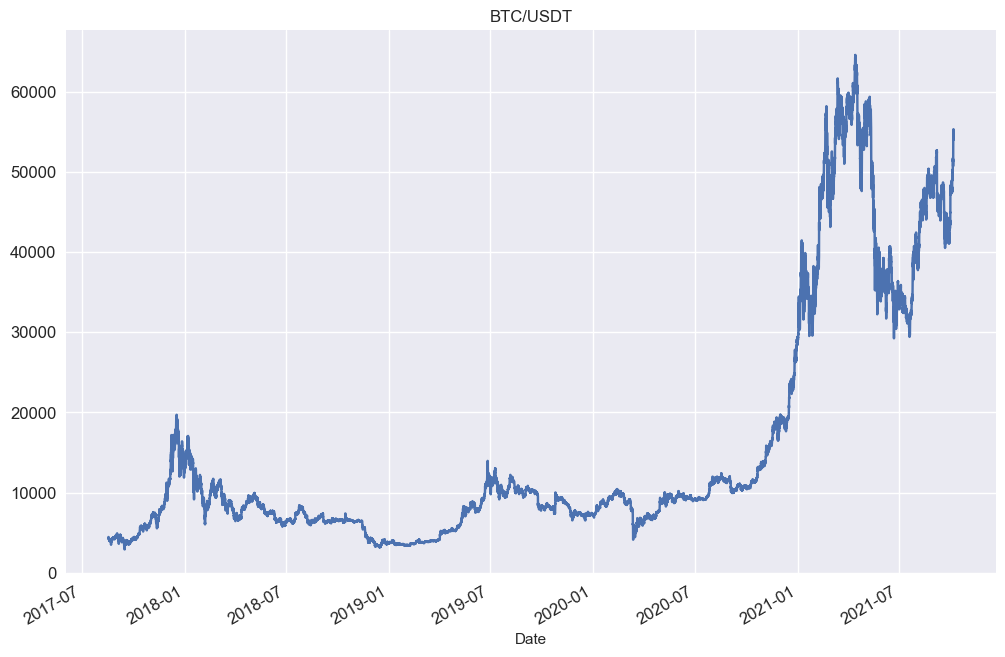

In [6]:
df.Close.plot(figsize = (12 ,8), title = "BTC/USDT", fontsize = 12)
plt.show()

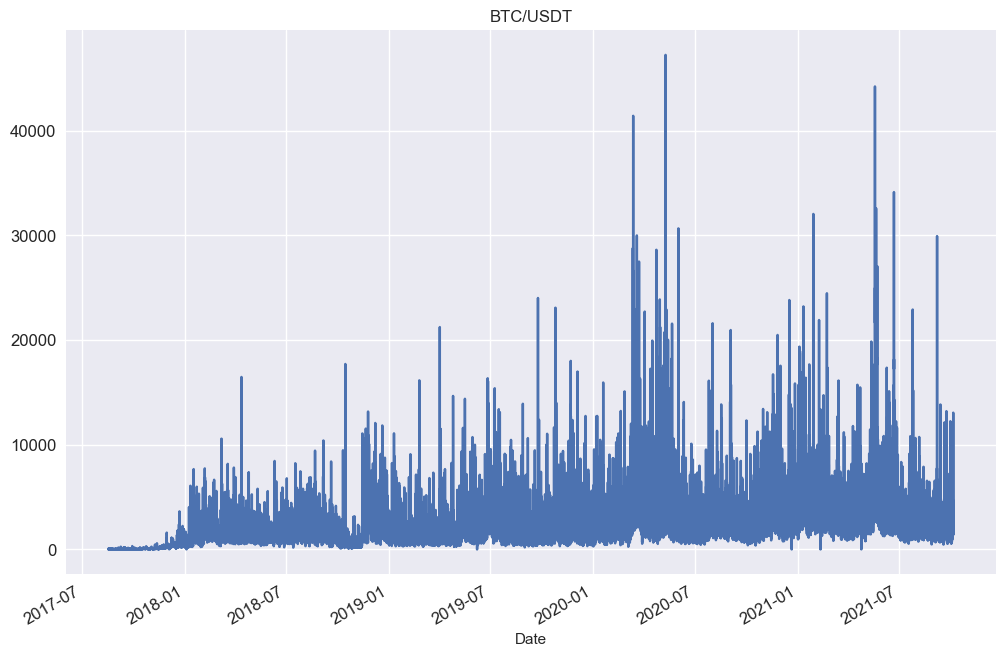

In [7]:
df.Volume.plot(figsize = (12 ,8), title = "BTC/USDT", fontsize = 12)
plt.show()

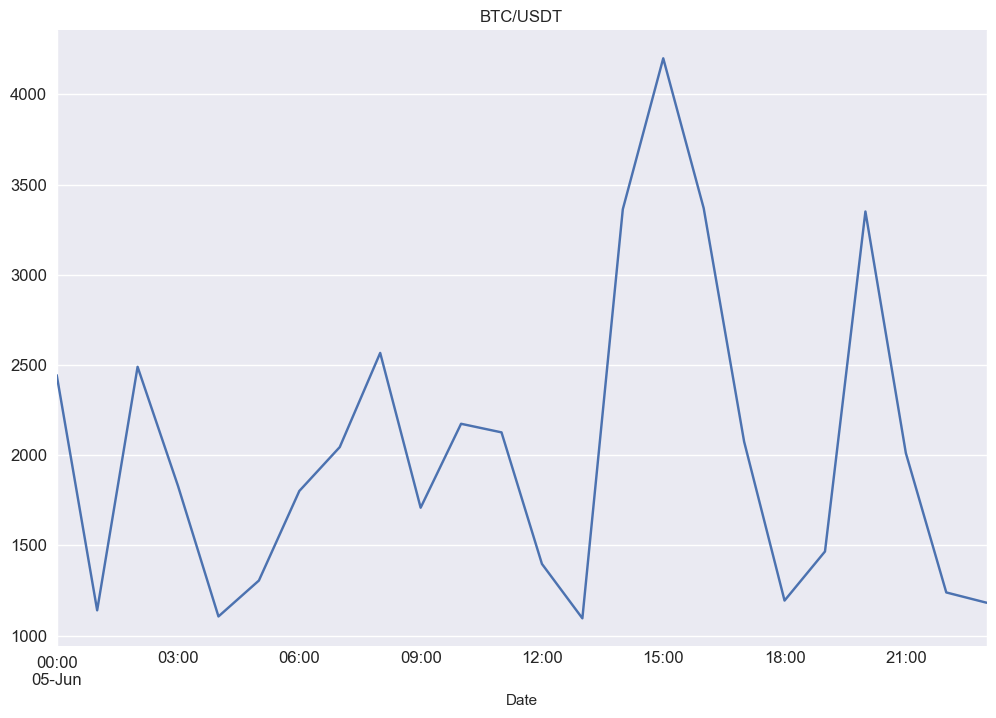

In [8]:
df.Volume.loc["2019-06-05"].plot(figsize = (12 ,8), title = "BTC/USDT", fontsize = 12)
plt.show()

In [9]:
df['returns'] = np.log(df.Close.div(df.Close.shift(1)))

In [10]:
df

,Close,Volume,returns
Date,,,
2017-08-17 04:00:00,4308.83,47.181009,NaN
2017-08-17 05:00:00,4315.32,23.234916,0.001505
2017-08-17 06:00:00,4324.35,7.229691,0.002090
2017-08-17 07:00:00,4349.99,4.443249,0.005912
2017-08-17 08:00:00,4360.69,0.972807,0.002457
...,...,...,...
2021-10-07 05:00:00,54735.76,2251.122020,-0.006146
2021-10-07 06:00:00,54534.16,1783.004260,-0.003690
2021-10-07 07:00:00,54755.92,4163.431360,0.004058


In [11]:
df.describe()

,Close,Volume,returns
count,36168.000000,36168.000000,36167.000000
mean,15211.287479,2121.344201,0.000070
std,14918.059912,2211.660869,0.009669
min,2919.000000,0.000000,-0.201033
25%,6619.987500,910.157520,-0.002955
50%,9110.620000,1551.676864,0.000139
75%,13411.242500,2603.584828,0.003258
max,64577.260000,47255.762685,0.160280


<function matplotlib.pyplot.show(close=None, block=None)>

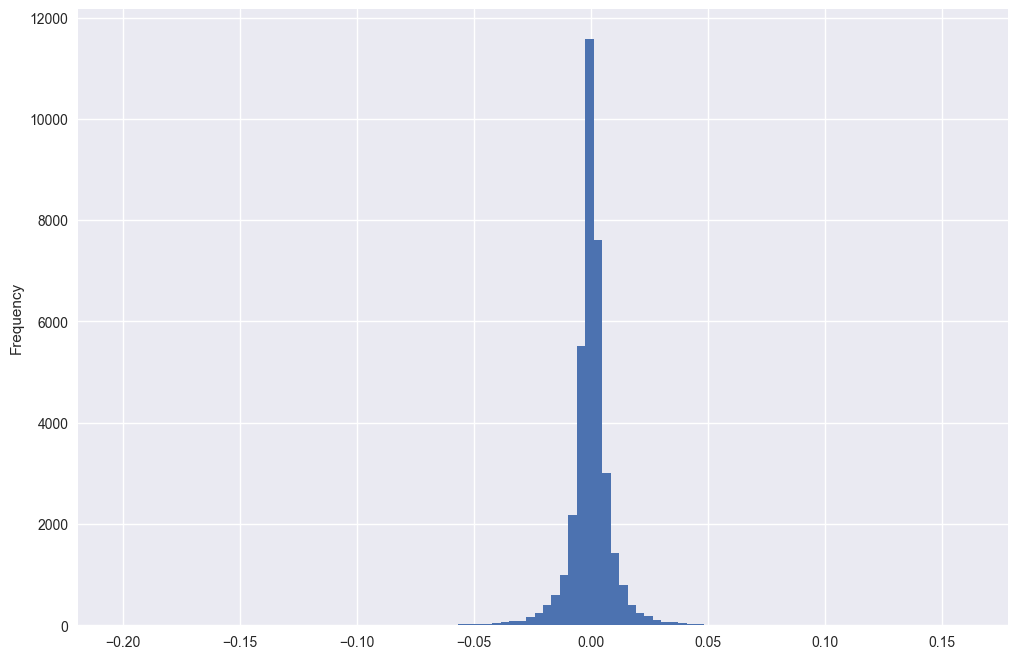

In [12]:
df.returns.plot(kind="hist", bins=100,figsize=(12,8))
plt.show

In [13]:
# df.returns.nlargest(10)
df.returns.nsmallest(10)

Date
2020-03-12 10:00:00   -0.201033
2020-03-12 23:00:00   -0.189707
2020-03-13 01:00:00   -0.119449
2017-12-28 02:00:00   -0.108097
2017-12-22 13:00:00   -0.107858
2017-09-05 01:00:00   -0.099818
2017-08-22 04:00:00   -0.098295
2020-03-15 22:00:00   -0.095180
2021-05-19 12:00:00   -0.093810
2019-09-24 18:00:00   -0.093730
Name: returns, dtype: float64

In [14]:
df.returns.sum()

2.528234304212195

In [15]:
df.Close/df.Close[0]

Date
2017-08-17 04:00:00     1.000000
2017-08-17 05:00:00     1.001506
2017-08-17 06:00:00     1.003602
2017-08-17 07:00:00     1.009552
2017-08-17 08:00:00     1.012036
                         ...    
2021-10-07 05:00:00    12.703161
2021-10-07 06:00:00    12.656373
2021-10-07 07:00:00    12.707839
2021-10-07 08:00:00    12.657334
2021-10-07 09:00:00    12.531360
Name: Close, Length: 36168, dtype: float64

In [16]:
df['creturns']=df.returns.cumsum().apply(np.exp)

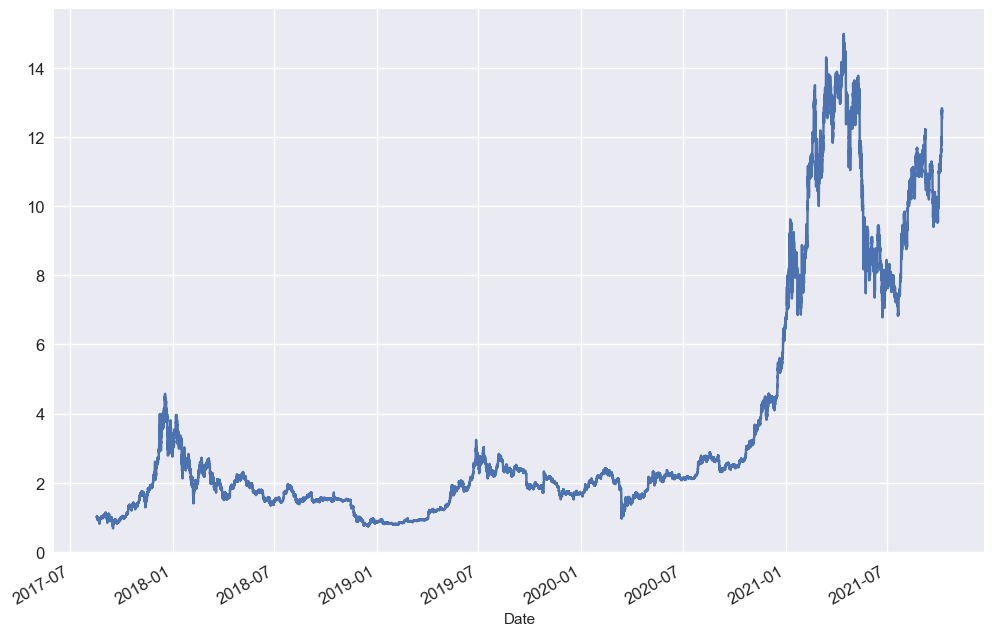

In [17]:
df.creturns.plot(figsize=(12,8),fontsize=12)
plt.show()

####  Learning
- If we have started with `$1` then on 2021 it would return `$12`

In [18]:
mu = df.returns.mean()
mu

6.990445168834005e-05

In [19]:
std = df.returns.std()
std

0.009669001511177772

In [20]:
number_of_periods = 24*365.25
number_of_periods

8766.0

In [21]:
ann_mean = mu * number_of_periods
ann_mean

0.6127824234999889

In [22]:
ann_std = std * np.sqrt(number_of_periods)
ann_std

0.9052788232893794

### Compund Annualised Growth Rate

In [23]:
cagr = np.exp(ann_mean) -1
cagr

0.845559389167847

#### Risk Adjusted Return (Sharpe Ratio)
sharpe ratio below 1 means it risky, can give high returns and also can incur heavy loss

In [24]:
ann_mean/ann_std

0.6768991030557977

In [25]:
cagr/ann_std

0.9340319992192697

In [28]:
df['vol_ch'] = np.log(df.Volume.div(df.Volume.shift(1)))
df

/Users/abdullahghani/Desktop/myfiles/cod/pienv/lib/python3.9/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,Close,Volume,returns,creturns,vol_ch
Date,,,,,
2017-08-17 04:00:00,4308.83,47.181009,NaN,NaN,NaN
2017-08-17 05:00:00,4315.32,23.234916,0.001505,1.001506,-0.708335
2017-08-17 06:00:00,4324.35,7.229691,0.002090,1.003602,-1.167460
2017-08-17 07:00:00,4349.99,4.443249,0.005912,1.009552,-0.486810
2017-08-17 08:00:00,4360.69,0.972807,0.002457,1.012036,-1.518955
...,...,...,...,...,...
2021-10-07 05:00:00,54735.76,2251.122020,-0.006146,12.703161,0.439863
2021-10-07 06:00:00,54534.16,1783.004260,-0.003690,12.656373,-0.233129
2021-10-07 07:00:00,54755.92,4163.431360,0.004058,12.707839,0.848040


In [29]:
df.loc[df.vol_ch == -(np.inf),'vol_ch'] = np.nan
df.loc[df.vol_ch == np.inf,'vol_ch'] = np.nan

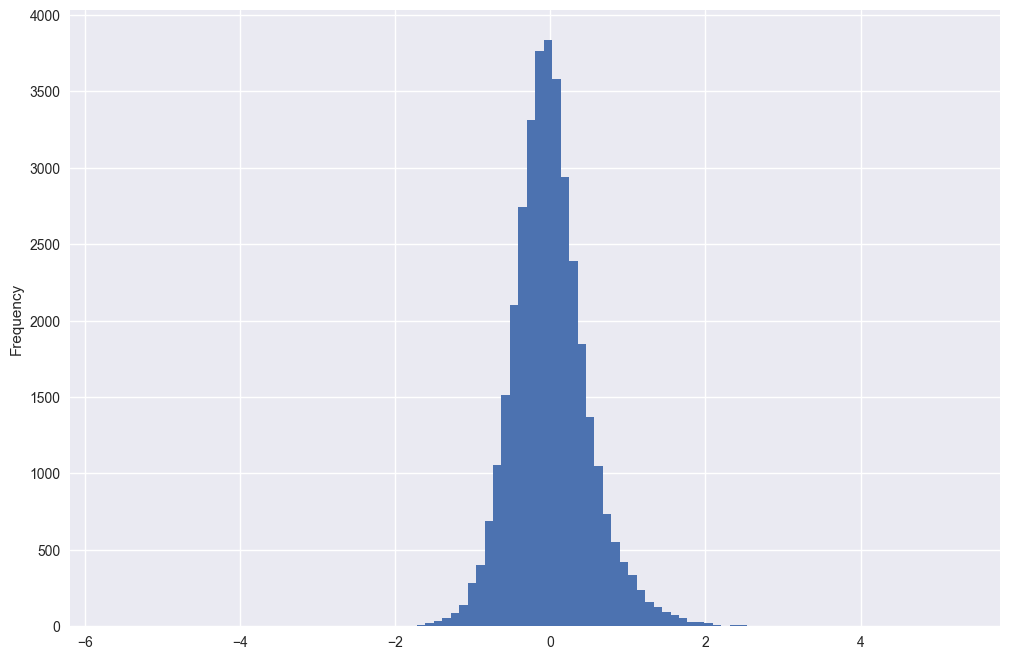

In [30]:
df.vol_ch.plot(kind='hist',bins=100, figsize=(12,8))
plt.show()

##### Fact :- Rapid change in trading volumns triggers extreme price changes (leading to rapid profit and loss)

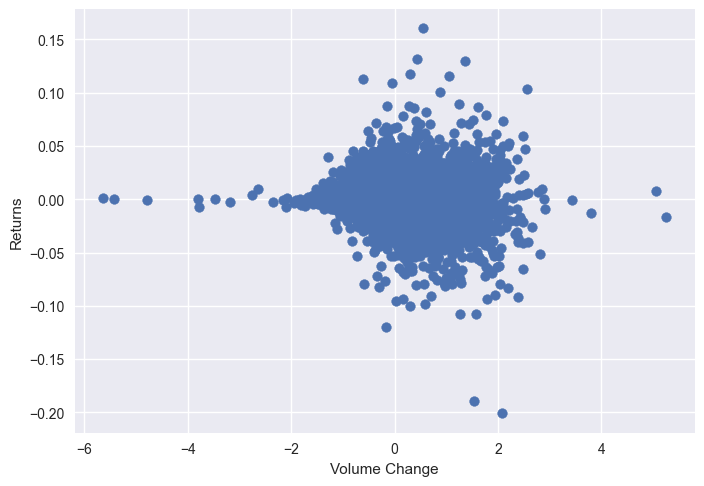

In [31]:
from importlib import reload
plt=reload(plt)
plt.scatter(x = df.vol_ch, y=df.returns)
plt.xlabel("Volume Change")
plt.ylabel("Returns")
plt.show()

In [32]:
pd.qcut(df.returns,q=10)

Date
2017-08-17 04:00:00                   NaN
2017-08-17 05:00:00    (0.00119, 0.00245]
2017-08-17 06:00:00    (0.00119, 0.00245]
2017-08-17 07:00:00    (0.00437, 0.00823]
2017-08-17 08:00:00    (0.00245, 0.00437]
                              ...        
2021-10-07 05:00:00    (-0.00781, -0.004]
2021-10-07 06:00:00    (-0.004, -0.00216]
2021-10-07 07:00:00    (0.00245, 0.00437]
2021-10-07 08:00:00    (-0.004, -0.00216]
2021-10-07 09:00:00    (-0.202, -0.00781]
Name: returns, Length: 36168, dtype: category
Categories (10, interval[float64, right]): [(-0.202, -0.00781] < (-0.00781, -0.004] < (-0.004, -0.00216] < (-0.00216, -0.000935] ... (0.00119, 0.00245] < (0.00245, 0.00437] < (0.00437, 0.00823] < (0.00823, 0.16]]

In [33]:
df['ret_cat'] = pd.qcut(df.returns,q=10,labels=[-5,-4,-3,-2,-1,1,2,3,4,5])
df['vol_cat'] = pd.qcut(df.vol_ch,q=10,labels=[-5,-4,-3,-2,-1,1,2,3,4,5])
df

,Close,Volume,returns,creturns,vol_ch,ret_cat,vol_cat
Date,,,,,,,
2017-08-17 04:00:00,4308.83,47.181009,NaN,NaN,NaN,NaN,NaN
2017-08-17 05:00:00,4315.32,23.234916,0.001505,1.001506,-0.708335,2,-5
2017-08-17 06:00:00,4324.35,7.229691,0.002090,1.003602,-1.167460,2,-5
2017-08-17 07:00:00,4349.99,4.443249,0.005912,1.009552,-0.486810,4,-4
2017-08-17 08:00:00,4360.69,0.972807,0.002457,1.012036,-1.518955,3,-5
...,...,...,...,...,...,...,...
2021-10-07 05:00:00,54735.76,2251.122020,-0.006146,12.703161,0.439863,-4,4
2021-10-07 06:00:00,54534.16,1783.004260,-0.003690,12.656373,-0.233129,-3,-2
2021-10-07 07:00:00,54755.92,4163.431360,0.004058,12.707839,0.848040,3,5


In [34]:
matrix = pd.crosstab(df.vol_cat,df.ret_cat)
matrix

ret_cat,-5,-4,-3,-2,-1,1,2,3,4,5
vol_cat,,,,,,,,,,
-5,142,293,377,394,447,488,475,414,370,217
-4,193,288,407,398,435,436,446,393,374,246
-3,195,301,394,448,432,455,427,387,344,233
-2,230,346,391,429,432,427,435,351,310,265
-1,227,324,419,423,427,427,396,358,338,277
1,285,391,366,422,392,399,338,383,339,301
2,319,397,364,378,355,377,338,390,362,336
3,398,388,374,323,338,306,361,371,373,384
4,569,487,300,272,252,198,255,330,455,498


In [36]:
import seaborn as sns

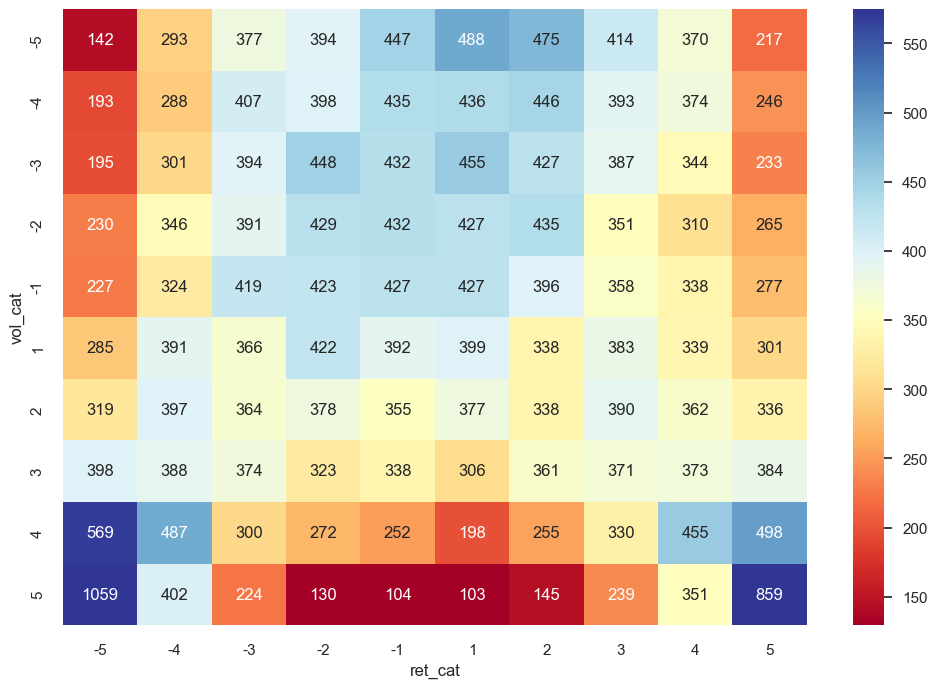

In [37]:
plt.figure(figsize=(12,8))
sns.set(font_scale=1)
sns.heatmap(matrix, cmap="RdYlBu", annot=True,robust=True,fmt=".0f")
plt.show()

In [38]:
df

,Close,Volume,returns,creturns,vol_ch,ret_cat,vol_cat
Date,,,,,,,
2017-08-17 04:00:00,4308.83,47.181009,NaN,NaN,NaN,NaN,NaN
2017-08-17 05:00:00,4315.32,23.234916,0.001505,1.001506,-0.708335,2,-5
2017-08-17 06:00:00,4324.35,7.229691,0.002090,1.003602,-1.167460,2,-5
2017-08-17 07:00:00,4349.99,4.443249,0.005912,1.009552,-0.486810,4,-4
2017-08-17 08:00:00,4360.69,0.972807,0.002457,1.012036,-1.518955,3,-5
...,...,...,...,...,...,...,...
2021-10-07 05:00:00,54735.76,2251.122020,-0.006146,12.703161,0.439863,-4,4
2021-10-07 06:00:00,54534.16,1783.004260,-0.003690,12.656373,-0.233129,-3,-2
2021-10-07 07:00:00,54755.92,4163.431360,0.004058,12.707839,0.848040,3,5


- Extreme increase in trading volume (last fews rows in above graph), triggers extreme (posive and negative) returns.
- Low to moderate Volumen changes (first few rows), occur frequently with low to moderate returns

In [39]:
matrix = pd.crosstab(df.vol_cat.shift(),df.ret_cat.shift(), values = df.returns, aggfunc='mean')
matrix

ret_cat,-5,-4,-3,-2,-1,1,2,3,4,5
vol_cat,,,,,,,,,,
-5,0.004261,0.000472,-0.000468,0.000831,-0.000319,-0.000100,-0.000354,0.000026,-0.000246,0.000195
-4,0.002740,-0.000697,0.000007,-0.000135,-0.000054,0.000337,-0.000012,0.000270,-0.001055,-0.004226
-3,-0.000696,0.001505,0.000249,-0.000572,-0.000003,0.000179,-0.000275,-0.000104,0.000019,-0.000956
-2,0.003580,0.000328,-0.000433,0.000449,0.000076,-0.000517,-0.000793,0.000129,-0.000508,-0.000674
-1,-0.001165,0.001731,0.000713,0.000034,-0.000208,-0.000012,-0.000565,-0.000122,0.000196,-0.001321
1,0.001398,-0.000612,0.000845,-0.000018,0.000559,-0.000516,0.000030,-0.000430,-0.000024,-0.000360
2,0.000818,0.000331,-0.000028,0.000785,-0.000476,0.000207,0.000138,-0.000014,0.000073,0.000264
3,0.001445,-0.000156,0.000322,0.000101,-0.000209,0.000140,0.000294,0.000232,-0.000231,0.000550
4,0.000964,0.000152,-0.000551,0.000856,-0.000107,-0.000772,-0.000005,-0.000065,0.000033,-0.000394


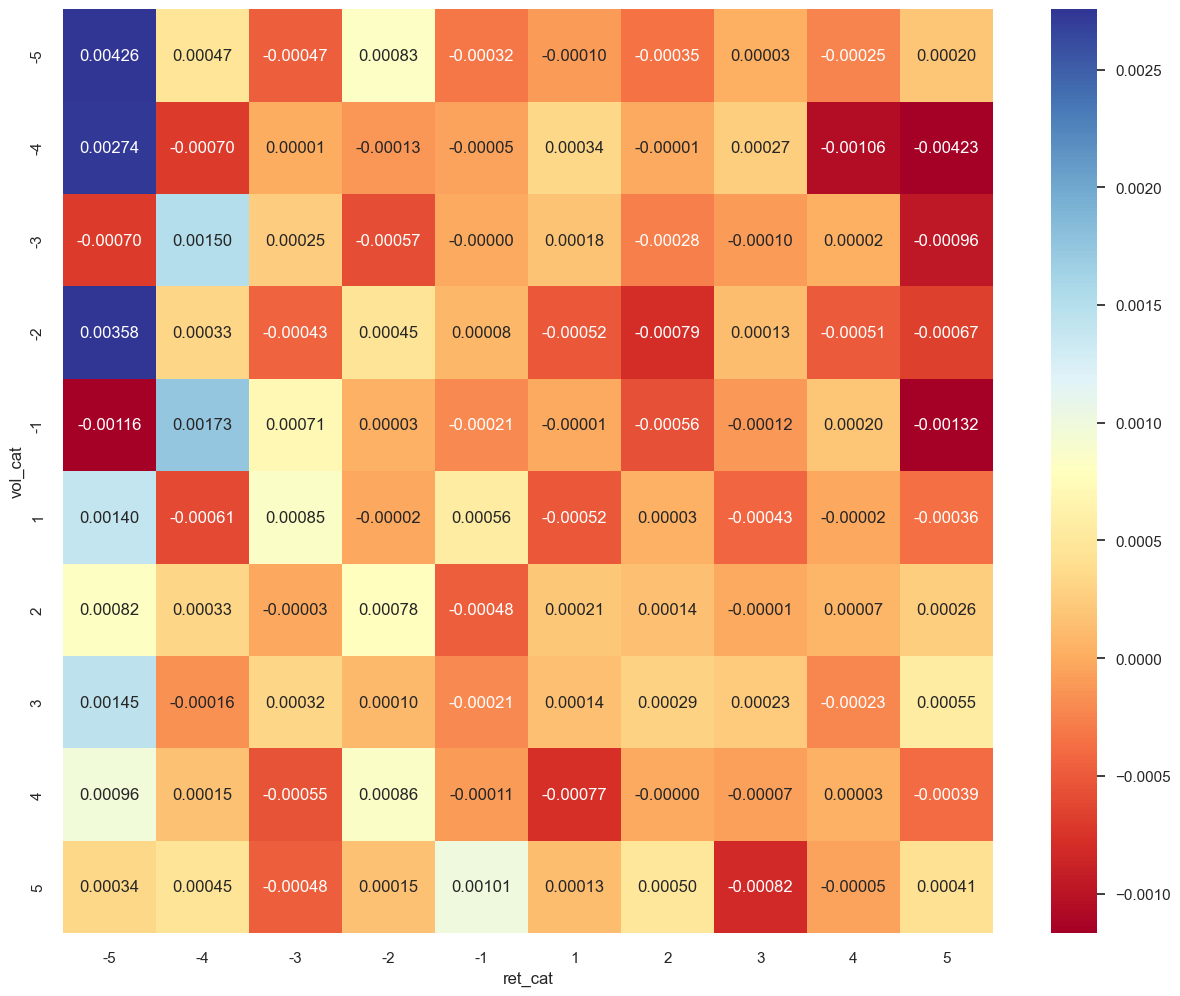

In [40]:
plt.figure(figsize=(15,12))
sns.set(font_scale=1)
sns.heatmap(matrix, cmap='RdYlBu', annot=True, robust=True, fmt=".5f")
plt.show()

- Extremely High (+ve) returns and decrease in volume is a contrarian (mean reverting) signal => **Prices will fall**
    - when there is low volume of transaction and heavy returns then market will fall
- Extremely Low (-ve) returns and decrease in volume is a contrarian (mean reverting) signal => **Prices will rise**
    - when there is low volume of transaction and low returns then market will rise

-----

In [43]:
df['position'] = 1
df

,Close,Volume,returns,creturns,vol_ch,ret_cat,vol_cat,position
Date,,,,,,,,
2017-08-17 04:00:00,4308.83,47.181009,NaN,NaN,NaN,NaN,NaN,1
2017-08-17 05:00:00,4315.32,23.234916,0.001505,1.001506,-0.708335,2,-5,1
2017-08-17 06:00:00,4324.35,7.229691,0.002090,1.003602,-1.167460,2,-5,1
2017-08-17 07:00:00,4349.99,4.443249,0.005912,1.009552,-0.486810,4,-4,1
2017-08-17 08:00:00,4360.69,0.972807,0.002457,1.012036,-1.518955,3,-5,1
...,...,...,...,...,...,...,...,...
2021-10-07 05:00:00,54735.76,2251.122020,-0.006146,12.703161,0.439863,-4,4,1
2021-10-07 06:00:00,54534.16,1783.004260,-0.003690,12.656373,-0.233129,-3,-2,1
2021-10-07 07:00:00,54755.92,4163.431360,0.004058,12.707839,0.848040,3,5,1


#### Sell and go Neutral (position =0) if returns are very high (cond1) and vol_ch is negative(cond2)

In [44]:
# return thershold for high returns, 
return_thresh = np.percentile(df.returns.dropna(), 90)
return_thresh

0.008231867023808183

- top 10 percentile retuns have return more than 0.82%

In [50]:
volume_thresh = np.percentile(df.vol_ch.dropna(),[5,20])
volume_thresh

array([-0.72939837, -0.37622578])

In [52]:
cond1 = df.returns >= return_thresh
cond2 = df.vol_ch.between(volume_thresh[0],volume_thresh[1])

In [54]:
df.loc[cond1 & cond2, "position"] = 0

In [57]:
df.position.value_counts(0)

1    35804
0      364
Name: position, dtype: int64

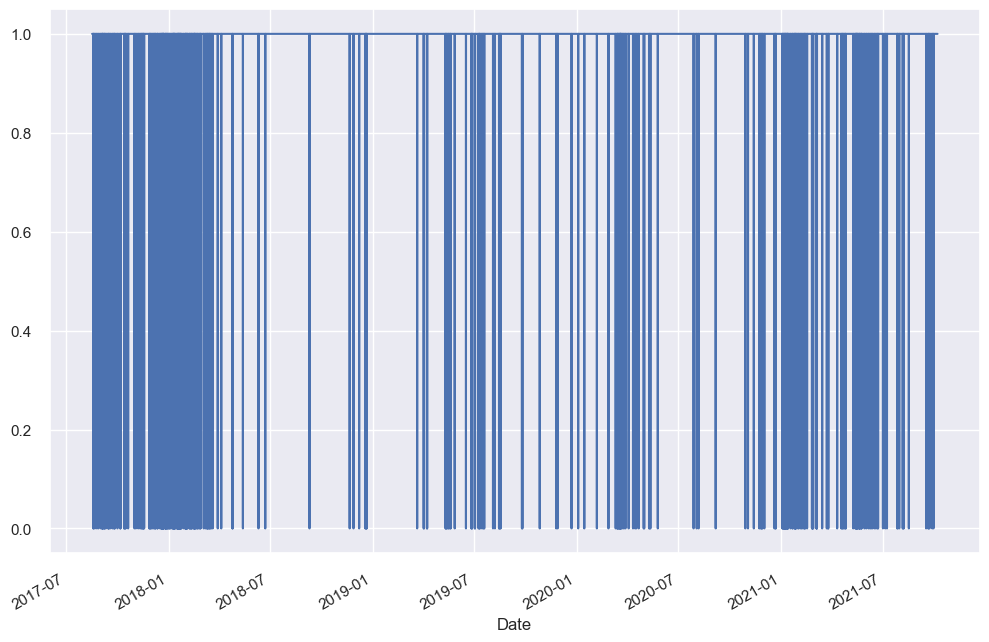

In [59]:
df.position.plot(figsize=(12,8))
plt.show()

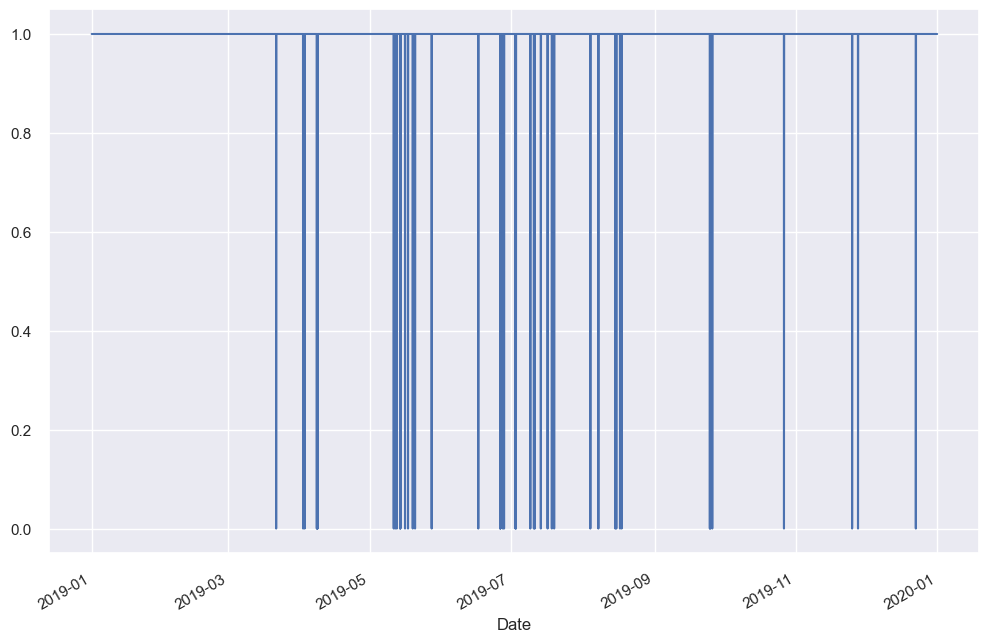

In [67]:
df.position.loc['2019'].plot(figsize=(12,8))
plt.show()

#### Now we need to backtest and check if out strategy worked or not
- we need to shift the position column as we do the transaction at the end of the hour

In [69]:
df['strategy'] = df.position.shift(1) * df.returns
df

,Close,Volume,returns,creturns,vol_ch,ret_cat,vol_cat,position,strategy
Date,,,,,,,,,
2017-08-17 04:00:00,4308.83,47.181009,NaN,NaN,NaN,NaN,NaN,1,NaN
2017-08-17 05:00:00,4315.32,23.234916,0.001505,1.001506,-0.708335,2,-5,1,0.001505
2017-08-17 06:00:00,4324.35,7.229691,0.002090,1.003602,-1.167460,2,-5,1,0.002090
2017-08-17 07:00:00,4349.99,4.443249,0.005912,1.009552,-0.486810,4,-4,1,0.005912
2017-08-17 08:00:00,4360.69,0.972807,0.002457,1.012036,-1.518955,3,-5,1,0.002457
...,...,...,...,...,...,...,...,...,...
2021-10-07 05:00:00,54735.76,2251.122020,-0.006146,12.703161,0.439863,-4,4,1,-0.006146
2021-10-07 06:00:00,54534.16,1783.004260,-0.003690,12.656373,-0.233129,-3,-2,1,-0.003690
2021-10-07 07:00:00,54755.92,4163.431360,0.004058,12.707839,0.848040,3,5,1,0.004058


In [77]:
df[['returns','strategy']].sum().apply(np.exp)

returns     12.531360
strategy    35.082084
dtype: float64

In [80]:
df['cstrategy'] = df.strategy.cumsum().apply(np.exp)
df

,Close,Volume,returns,creturns,vol_ch,ret_cat,vol_cat,position,strategy,cstrategy
Date,,,,,,,,,,
2017-08-17 04:00:00,4308.83,47.181009,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN
2017-08-17 05:00:00,4315.32,23.234916,0.001505,1.001506,-0.708335,2,-5,1,0.001505,1.001506
2017-08-17 06:00:00,4324.35,7.229691,0.002090,1.003602,-1.167460,2,-5,1,0.002090,1.003602
2017-08-17 07:00:00,4349.99,4.443249,0.005912,1.009552,-0.486810,4,-4,1,0.005912,1.009552
2017-08-17 08:00:00,4360.69,0.972807,0.002457,1.012036,-1.518955,3,-5,1,0.002457,1.012036
...,...,...,...,...,...,...,...,...,...,...
2021-10-07 05:00:00,54735.76,2251.122020,-0.006146,12.703161,0.439863,-4,4,1,-0.006146,35.563047
2021-10-07 06:00:00,54534.16,1783.004260,-0.003690,12.656373,-0.233129,-3,-2,1,-0.003690,35.432063
2021-10-07 07:00:00,54755.92,4163.431360,0.004058,12.707839,0.848040,3,5,1,0.004058,35.576146


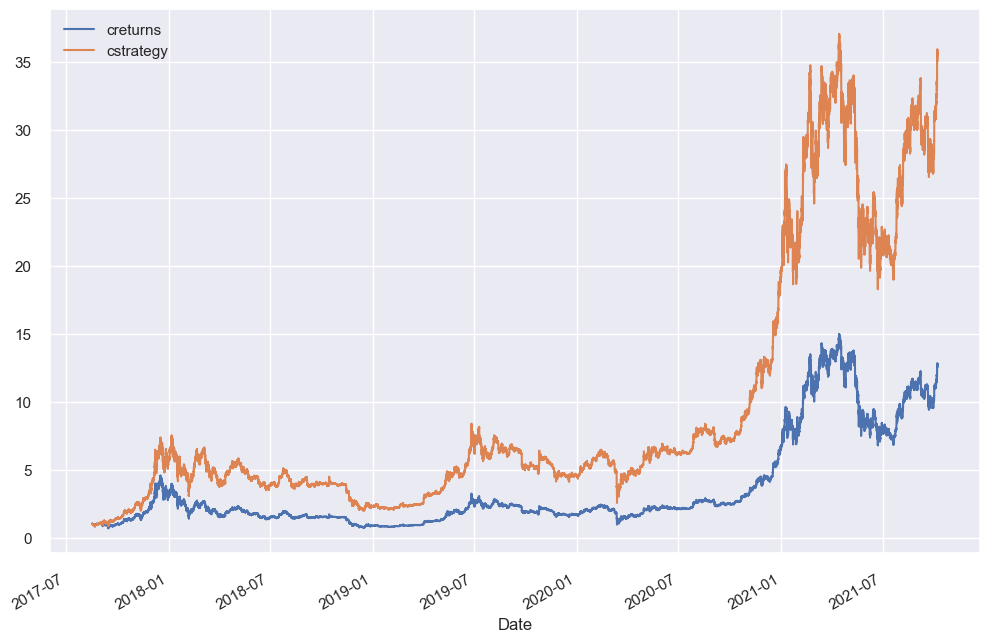

In [82]:
df[['creturns','cstrategy']].plot(figsize=(12,8))
plt.show()

In [83]:
tp_year = 24*365.25
tp_year

8766.0

In [86]:
ann_mean = df[['returns', 'strategy']].mean() * tp_year
ann_mean

returns     0.612782
strategy    0.862298
dtype: float64

In [88]:
ann_std = df[['returns', 'strategy']].std() * np.sqrt(tp_year)
ann_std

returns     0.905279
strategy    0.891472
dtype: float64

In [89]:
sharpe = (np.exp(ann_mean) -1) / ann_std
sharpe

returns     0.934032
strategy    1.535209
dtype: float64